# Ghouls_Goblins_Ghosts

**Challange (as listed on kaggle.com):**  
Get out your dowsing rods, electromagnetic sensors, and gradient boosting machines. Kaggle is haunted and we need your help. After a month of making scientific observations and taking careful measurements, we’ve determined that 900 ghouls, ghosts, and goblins are infesting our halls and frightening our data scientists. When trying garlic, asking politely, and using reverse psychology didn't work, it became clear that machine learning is the only answer to banishing our unwanted guests.

So now the hour has come to put the data we’ve collected in your hands. We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. And only an accurate classification algorithm can thwart them. Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. Are you ghost-busters up for the challenge?

**Solution:**  
I will tackle this problem in two parts. i) Exploratory data analysis for in-depth understanding of the features of the data using *pandas*, *matplotlib* and *seaborn* libraries. ii) Applying different machine learning alogrithms/techniquies using *scikit-learn* library

# Part 1: Exploratory Data Analysis

Importing dependencies

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

Importing training and test data (index of the dataset is set as the id of the creature) 

In [5]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

Data Fields:  
*id* - id of the creature  
*bone_length* - average length of bone in the creature, normalized between 0 and 1  
*rotting_flesh* - percentage of rotting flesh in the creature  
*hair_length* - average hair length, normalized between 0 and 1  
*has_soul* - percentage of soul in the creature  
*color* - dominant color of the creature: 'white','black','clear','blue','green','blood'  
*type* - target variable: 'Ghost', 'Goblin', and 'Ghoul'

In [6]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [7]:
train.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


This data is relatively clean an there is no missing values (data count to be exactly 371 for all data fields). Moreover, continuous data fields (all data fields except *color* and *type*) are already normalized between 0 to 1. Doing these tasks takes around 50%-70% of the time in data science problems. Kaggle.com generally provides clean datasets so if one wants to learn data cleaning and munging, kaggle.com is not the right place.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A65BF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBFBE10>]], dtype=object)

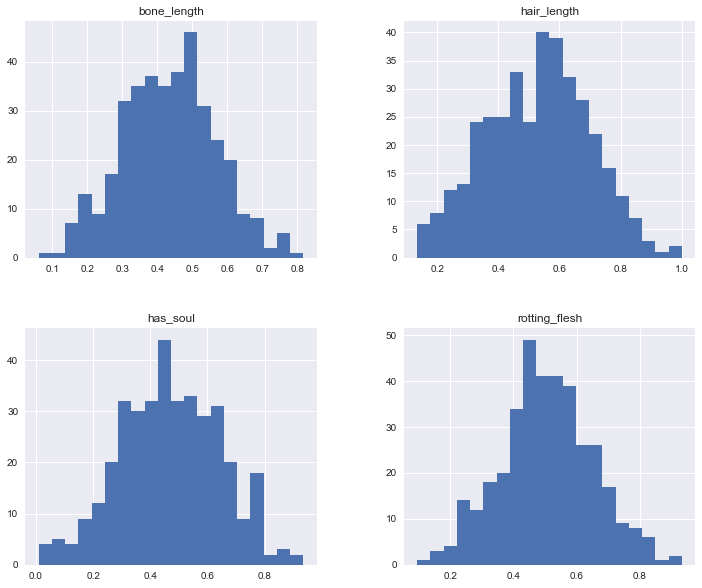

In [8]:
train.hist(figsize=(12,10), bins =20)

Note that the histograms of all continuous data fields have mean around 0.5 and it looks like data has been generated using truncated Gussian distributation with different standard deviations

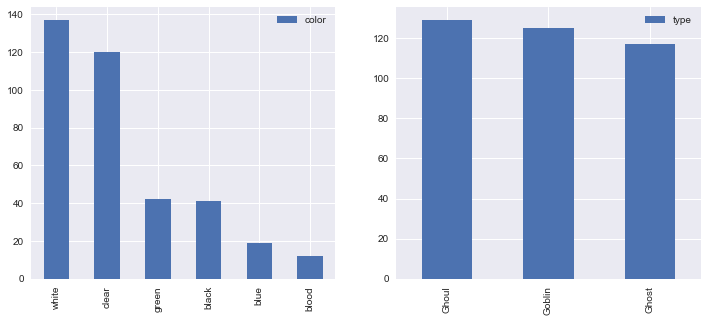

In [9]:
f, axarr = plt.subplots(1, 2, figsize=(12,5))
train[['color']].apply(pd.value_counts).plot.bar(ax = axarr[0])
train[['type']].apply(pd.value_counts).plot.bar(ax = axarr[1])

*color* data field has unequal number of records with *white* and *dear* have maximum occurrences whereas *blue* and *blood* have least. Classification would have been more easier/accurate with uniform nuumber of records. We are fortunate to have that for *type* data field with *Ghoul*, *Goublin* and *Ghost* have almost same number of occurances (around 120 each).

Replacing textual data fileds *color* and *type* with binary dummies and generating new dataset *train_plot* for data analysis

In [10]:
color_dummies = pd.get_dummies(train['color'], prefix='color')
type_dummies = pd.get_dummies(train['type'], prefix='type')
train_plot = pd.concat([train, color_dummies, type_dummies], axis=1)
train_plot.drop(['color','type'], axis=1, inplace=True)
train_plot.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type_Ghost,type_Ghoul,type_Goblin
id,,,,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0,0,1,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0,0,0,1
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0,0,1,0
4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0,0,1,0
5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0,1,0,0


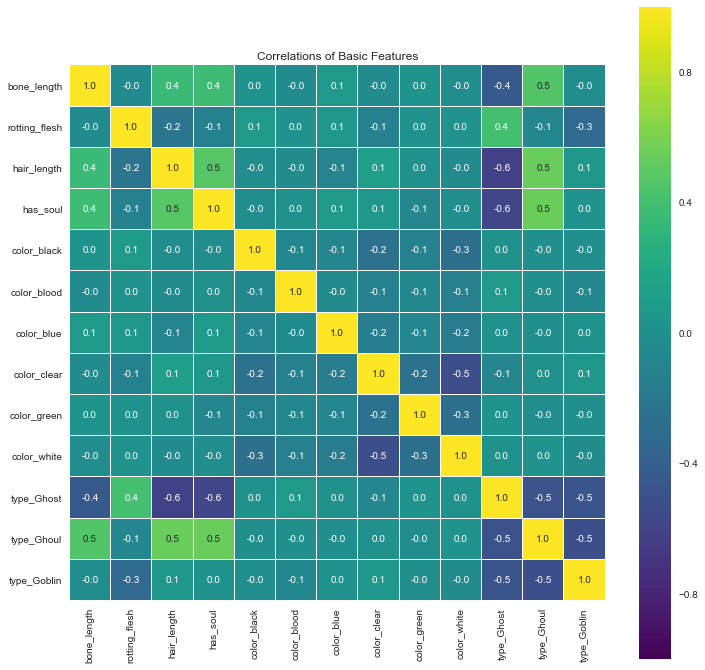

In [11]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Correlations of Basic Features")
sns.heatmap(train_plot.corr(), cmap=colormap, square=True, fmt='.1f',linewidths=0.1, linecolor='white', annot=True)
plt.show()

Observations from correlation plot:  
a) *hair_length*, *has_soul* and *bone_length* will serve as excellent classifiers. *Ghost* tends to have shorter *hair_length* and *bone_length* with lower *has_soul*. *Ghoul* tends to have excatly oppisite of what *Ghost* has whereas *Goblin* shows no correlation with these features. It's clear from the correlation scores that the *has_soul* should be the single most important feature for classification followed by *hair_length* and *bone_length*.  
b) *rotting_flesh* is relatively weakly correlated with *type*. However, the correlation is still meaningful for classification.  
c) *color* feature doesn't show any correlation with *type* and hence it will be less significant in classification. So, the unequal records observed for the classes of *color* feature (as shown in the bar chart) wouldn't matter much.

# Part 2: Machine Learning

Preparing feedable *train* and *test* data for classification using *scikit-learn*

In [12]:
features = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']

# train data (x = features, y = labels)
X_train = train[features]
color_dummies = pd.get_dummies(X_train['color'], prefix='color')
X_train = pd.concat([X_train, color_dummies], axis=1)
X_train.drop(['color'], axis=1, inplace=True)

y_train = train['type']
type_dict = dict(zip(y_train.unique(), range(len(y_train.unique()))))
y_train = y_train.replace(to_replace = type_dict)

# test data
X_test = test[features]
color_dummies = pd.get_dummies(X_test['color'], prefix='color')
X_test = pd.concat([X_test, color_dummies], axis=1)
X_test.drop(['color'], axis=1, inplace=True)


X_test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


I will first start with the most basic classifier: Gussian Naive Bayes. K-fold cross validation (CV) with different number of folds is performed. Note that mean score and stadard deviation both increase with the increase in CV folds.

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()
cv_matrix = [2, 3, 5, 7, 10, 15, 25]

for cv in cv_matrix:
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print('CV = ', cv, '; mean score = ', mean_score, '; standard deviation = ', std_score)
    

CV =  2 ; mean score =  0.649747151825 ; standard deviation =  0.0187311090444
CV =  3 ; mean score =  0.641489640703 ; standard deviation =  0.0204249980228
CV =  5 ; mean score =  0.638926323584 ; standard deviation =  0.0475169968036
CV =  7 ; mean score =  0.640988486993 ; standard deviation =  0.0638596851142
CV =  10 ; mean score =  0.65453397006 ; standard deviation =  0.0860872413607
CV =  15 ; mean score =  0.674367521368 ; standard deviation =  0.0873031221384
CV =  25 ; mean score =  0.672857142857 ; standard deviation =  0.102777057667


Logistic Regression classifier with cross validation (cv=10) and hyperparameter optimization

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_values = {'C': [10, 100, 1000, 10000]}
grid_clf_acc = GridSearchCV(LogisticRegression(), param_grid = grid_values, cv=10, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

print('Mean score matrix: ', grid_clf_acc.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Mean score matrix:  [ 0.71428571  0.71967655  0.71698113  0.71698113]
Grid best parameter (max. accuracy):  {'C': 100}
Grid best score (accuracy):  0.719676549865


Support Vector classifier with cross validation (cv=10) and hyperparameter optimization

In [49]:
from sklearn.svm import SVC

grid_values = {'C': [110, 115, 120, 125, 150], 'gamma': [0.001, 0.006,  0.01, 0.02, 0.1]}
grid_clf_acc = GridSearchCV(SVC(), param_grid = grid_values, cv=10, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

print('Mean score matrix: ', grid_clf_acc.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Mean score matrix:  [ 0.6819407   0.69811321  0.70350404  0.73045822  0.71967655  0.67924528
  0.69541779  0.70889488  0.73045822  0.72506739  0.67654987  0.70080863
  0.70889488  0.73584906  0.72506739  0.68463612  0.69541779  0.71428571
  0.73315364  0.7277628   0.66846361  0.69272237  0.71698113  0.73045822
  0.71698113]
Grid best parameter (max. accuracy):  {'C': 120, 'gamma': 0.02}
Grid best score (accuracy):  0.735849056604


Random Forest classifier with cross validation (cv=10) and hyperparameter optimization

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

grid_values = {'max_depth' : [4, 6, 8, 10], 'n_estimators': [100, 50, 10, 5], 
               'max_features': ['sqrt', 'auto', 'log2'], 'bootstrap': [True, False]}
grid_clf_acc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid = grid_values, cv=10, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

print('Mean score matrix: ', grid_clf_acc.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Mean score matrix:  [ 0.68733154  0.67924528  0.65498652  0.64150943  0.68733154  0.67924528
  0.65498652  0.64150943  0.68733154  0.67924528  0.65498652  0.64150943
  0.69811321  0.70080863  0.71698113  0.66037736  0.69811321  0.70080863
  0.71698113  0.66037736  0.69811321  0.70080863  0.71698113  0.66037736
  0.68733154  0.70080863  0.70080863  0.63342318  0.68733154  0.70080863
  0.70080863  0.63342318  0.68733154  0.70080863  0.70080863  0.63342318
  0.69541779  0.68733154  0.69541779  0.66037736  0.69541779  0.68733154
  0.69541779  0.66037736  0.69541779  0.68733154  0.69541779  0.66037736
  0.67924528  0.6819407   0.68463612  0.63881402  0.67924528  0.6819407
  0.68463612  0.63881402  0.67924528  0.6819407   0.68463612  0.63881402
  0.70350404  0.70619946  0.69541779  0.67924528  0.70350404  0.70619946
  0.69541779  0.67924528  0.70350404  0.70619946  0.69541779  0.67924528
  0.69811321  0.70350404  0.67115903  0.65768194  0.69811321  0.70350404
  0.67115903  0.65768194  0.6981

Finding relative importance of the features for classification using random forests. As predicted using the correlation plot, *has_soul*, *hair_length* and *bone_length* are the most important features (in decreasing order of importance) whereas *color* is the least important.

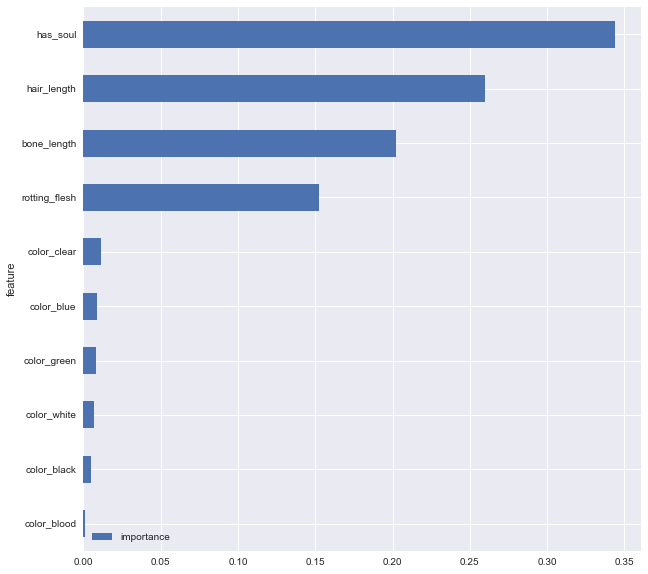

In [78]:
clf = RandomForestClassifier(n_estimators=10, max_depth=6, max_features='sqrt', bootstrap=True, random_state=0)
clf.fit(X_train, y_train)

feature_imp = pd.DataFrame()
feature_imp['feature'] = X_train.columns
feature_imp['importance'] = clf.feature_importances_
feature_imp.sort_values(by=['importance'], ascending=True, inplace=True)
feature_imp.set_index('feature', inplace=True)
feature_imp.plot(kind='barh', figsize=(10, 10))